In [1]:
import sys
sys.path.insert(0,'..')

In [2]:
from dataset import ASODataset
from graph_fn import single_graph_batch
from trainer import Trainer
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import ExponentialLR
import torch
from torch_geometric.loader import DataLoader
from models import *

In [5]:
#hyperparameters
LEARNING_RATE = 1e-2
BATCH_SIZE = 16
NODE_INPUT_SIZE = 14
OUTPUT_SIZE_BEFORE_POOL = 20
NODE_HIDDEN_SIZE = 50
EPOCHS = 50
DROP_OUT = 0.05
BOND_ATTR = 5

Run 1
Epoch: 050, Train Loss: 0.4571, Test Loss: 0.4814, Train MAE: 0.0518, Test MAE: 0.0631, , Train R2: 0.7785, Test R2: 0.7294
Run 2
Epoch: 050, Train Loss: 0.4536, Test Loss: 0.4777, Train MAE: 0.0482, Test MAE: 0.0590, , Train R2: 0.8139, Test R2: 0.7621
Run 3
Epoch: 050, Train Loss: 0.4541, Test Loss: 0.4779, Train MAE: 0.0486, Test MAE: 0.0585, , Train R2: 0.8099, Test R2: 0.7640
Run 4
Epoch: 050, Train Loss: 0.4501, Test Loss: 0.4720, Train MAE: 0.0405, Test MAE: 0.0464, , Train R2: 0.8763, Test R2: 0.8512
Run 5
Epoch: 050, Train Loss: 0.4553, Test Loss: 0.4789, Train MAE: 0.0519, Test MAE: 0.0632, , Train R2: 0.8080, Test R2: 0.7636
0.042544004321098325 0.050962920486927035 0.8571649385680036 0.8296004899470063


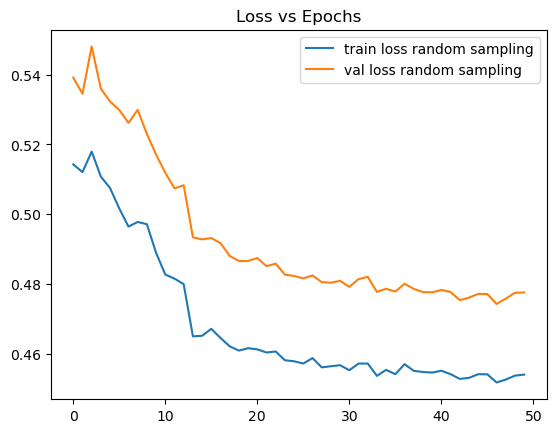

In [6]:
import numpy as np

train_loss = 0
test_loss = 0
train_R2 = 0
train_MAE = 0
test_MAE = 0
test_R2 = 0

NUM_RUN = 5
a = ASODataset(single_graph_batch)

for i in range(NUM_RUN):
    print("Run " + str(i + 1))

    train_data, val_data = train_test_split(a.data, test_size = 0.1, random_state = 42)
    train_loader = DataLoader(train_data, batch_size = BATCH_SIZE, shuffle = True)
    val_loader = DataLoader(val_data, batch_size = BATCH_SIZE, shuffle = False)

    device = torch.device('cuda')
    model = GNNModel_sg(NODE_INPUT_SIZE, NODE_HIDDEN_SIZE, 
                      OUTPUT_SIZE_BEFORE_POOL, num_layers=3, dp_rate=DROP_OUT)
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
    scheduler = ExponentialLR(optimizer, gamma=0.95)

    t = Trainer(model, device, optimizer, scheduler, glob_v= False)
    results = t.train(train_loader, val_loader, nn.BCELoss, EPOCHS, silent = True)
    
    train_loss += np.array(t.log["train_loss"])
    test_loss += np.array(t.log["val_loss"])

    train_MAE += results[1]
    train_R2 += results[2]
    test_MAE += results[4]
    test_R2 += results[5]

train_loss /= NUM_RUN
test_loss /= NUM_RUN
train_MAE /= NUM_RUN
test_MAE /= NUM_RUN
train_R2 /= NUM_RUN
test_R2 /= NUM_RUN

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.title("Loss vs Epochs")
plt.plot(train_loss, label="train loss random sampling")
plt.plot(test_loss, label = "val loss random sampling")
plt.legend()

rs_train = train_loss
rs_test = test_loss

print(train_MAE, test_MAE, train_R2, test_R2)

Run 1
Epoch: 050, Train Loss: 0.4590, Test Loss: 0.4416, Train MAE: 0.0393, Test MAE: 0.0701, , Train R2: 0.8872, Test R2: 0.5017
Run 2
Epoch: 050, Train Loss: 0.4580, Test Loss: 0.4517, Train MAE: 0.0478, Test MAE: 0.0610, , Train R2: 0.8291, Test R2: 0.7503
Run 3
Epoch: 050, Train Loss: 0.4405, Test Loss: 0.5593, Train MAE: 0.0383, Test MAE: 0.1227, , Train R2: 0.8741, Test R2: 0.1438
Run 4
Epoch: 050, Train Loss: 0.4543, Test Loss: 0.4901, Train MAE: 0.0432, Test MAE: 0.0896, , Train R2: 0.8546, Test R2: 0.3936
Run 5
Epoch: 050, Train Loss: 0.4591, Test Loss: 0.4698, Train MAE: 0.0489, Test MAE: 0.0765, , Train R2: 0.8121, Test R2: 0.4902
0.040898419171571734 0.0773966483771801 0.8681069980686763 0.544699401749797


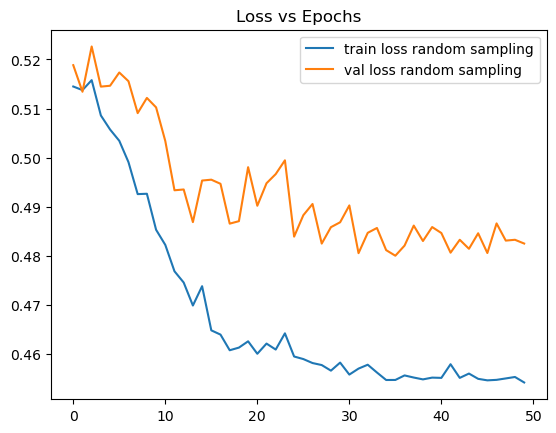

In [7]:
import numpy as np

train_loss = 0
test_loss = 0
train_R2 = 0
train_MAE = 0
test_MAE = 0
test_R2 = 0

NUM_RUN = 5
a = ASODataset(single_graph_batch)

for i in range(NUM_RUN):
    print("Run " + str(i + 1))

    train_data, val_data = a.sample_test_data_catalyst_only(10, 2, 2)
    train_loader = DataLoader(train_data, batch_size = BATCH_SIZE, shuffle = True)
    val_loader = DataLoader(val_data, batch_size = BATCH_SIZE, shuffle = False)

    device = torch.device('cuda')
    model = GNNModel_sg(NODE_INPUT_SIZE, NODE_HIDDEN_SIZE, 
                      OUTPUT_SIZE_BEFORE_POOL, num_layers=3, dp_rate=DROP_OUT)
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
    scheduler = ExponentialLR(optimizer, gamma=0.95)

    t = Trainer(model, device, optimizer, scheduler, glob_v= False)
    results = t.train(train_loader, val_loader, nn.BCELoss, EPOCHS, silent = True)
    
    train_loss += np.array(t.log["train_loss"])
    test_loss += np.array(t.log["val_loss"])

    train_MAE += results[1]
    train_R2 += results[2]
    test_MAE += results[4]
    test_R2 += results[5]

train_loss /= NUM_RUN
test_loss /= NUM_RUN
train_MAE /= NUM_RUN
test_MAE /= NUM_RUN
train_R2 /= NUM_RUN
test_R2 /= NUM_RUN

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.title("Loss vs Epochs")
plt.plot(train_loss, label="train loss random sampling")
plt.plot(test_loss, label = "val loss random sampling")
plt.legend()

mc_train = train_loss
mc_test = test_loss

print(train_MAE, test_MAE, train_R2, test_R2)

Run 1
Epoch: 050, Train Loss: 0.4603, Test Loss: 0.4903, Train MAE: 0.0676, Test MAE: 0.0827, , Train R2: 0.6966, Test R2: 0.4388
Run 2
Epoch: 050, Train Loss: 0.4454, Test Loss: 0.4808, Train MAE: 0.0544, Test MAE: 0.0670, , Train R2: 0.7737, Test R2: 0.7360
Run 3
Epoch: 050, Train Loss: 0.4491, Test Loss: 0.4982, Train MAE: 0.0573, Test MAE: 0.0865, , Train R2: 0.7598, Test R2: 0.4479
Run 4
Epoch: 050, Train Loss: 0.5081, Test Loss: 0.3957, Train MAE: 0.0626, Test MAE: 0.0598, , Train R2: 0.7205, Test R2: 0.6358
Run 5
Epoch: 050, Train Loss: 0.4449, Test Loss: 0.5226, Train MAE: 0.0530, Test MAE: 0.0914, , Train R2: 0.7321, Test R2: 0.4386
0.05776440277695656 0.0718138001859188 0.7365395538982326 0.6330894910963656


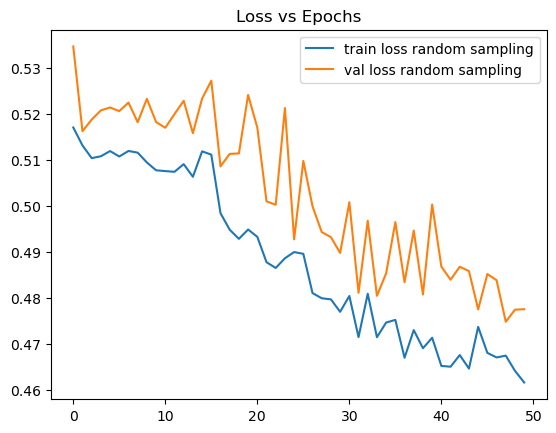

In [9]:
import numpy as np

train_loss = 0
test_loss = 0
train_R2 = 0
train_MAE = 0
test_MAE = 0
test_R2 = 0

NUM_RUN = 5
a = ASODataset(single_graph_batch)

for i in range(NUM_RUN):
    print("Run " + str(i + 1))

    train_data, val_data = a.sample_test_data_reactant_only(10, 2, 2)
    train_loader = DataLoader(train_data, batch_size = BATCH_SIZE, shuffle = True)
    val_loader = DataLoader(val_data, batch_size = BATCH_SIZE, shuffle = False)

    device = torch.device('cuda')
    model = GNNModel_sg(NODE_INPUT_SIZE, NODE_HIDDEN_SIZE, 
                      OUTPUT_SIZE_BEFORE_POOL, num_layers=3, dp_rate=DROP_OUT)
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
    scheduler = ExponentialLR(optimizer, gamma=0.95)

    t = Trainer(model, device, optimizer, scheduler, glob_v= False)
    results = t.train(train_loader, val_loader, nn.BCELoss, EPOCHS, silent = True)
    
    train_loss += np.array(t.log["train_loss"])
    test_loss += np.array(t.log["val_loss"])

    train_MAE += results[1]
    train_R2 += results[2]
    test_MAE += results[4]
    test_R2 += results[5]

train_loss /= NUM_RUN
test_loss /= NUM_RUN
train_MAE /= NUM_RUN
test_MAE /= NUM_RUN
train_R2 /= NUM_RUN
test_R2 /= NUM_RUN

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.title("Loss vs Epochs")
plt.plot(train_loss, label="train loss random sampling")
plt.plot(test_loss, label = "val loss random sampling")
plt.legend()

mr_train = train_loss
mr_test = test_loss

print(train_MAE, test_MAE, train_R2, test_R2)

In [11]:
mc_test.tofile('sg_mc_test.csv', sep=',')
mr_test.tofile('sg_mr_test.csv', sep=',')

rs_train.tofile('sg_rs_train.csv', sep=',')
rs_test.tofile('sg_rs_test.csv', sep=',')